### [Coursera:machine-learning-specialization] 1. Supervised vs. Unsupervised Machine Learning
# W2 : Linear Regression


### 레스토랑 프랜차이즈의 수익을 예측하기 위해 하나의 변수로 선형 회귀를 구현합니다

## 1) 필요 패키지 호출



In [5]:
import numpy as np                  # 파이썬에서 매트릭스 다룰때 사용하는 기본 툴
import matplotlib.pyplot as plt     # 시각화용 패키지
from utils import *                 # load_data, load_data_multi 커스텀 함수 불러오기
import copy                         
import math
%matplotlib inline

## 2) 문제 정의

### 프랜차이즈 레스토랑의 CEO로 새로운 매장을 열기 위해 여러 도시를 고려하고 있다고 가정합시다.
- 더 높은 수익을 줄 수 있는 도시로 비즈니스를 확장하고자 합니다
- 이미 여러 도시에 레스토랑이 있으며 도시의 수익 및 인구에 대한 데이터가 있습니다
- 또한 새로운 레스토랑의 후보 도시에 대한 데이터를 가지고 있습니다
    - 이 도시의 경우 도시인구가 있습니다

#### 데이터를 사용해 비지니스에 잠재적으로 더 높은 수익을 줄 수 있는 도시를 식별해 봅시다.


## 3) 데이터셋 정의

### 해당 task에 필요한 데이터를 불러옵니다
- x_train, y_train으로 load_data() 함수를 사용해 불러옵니다
    - x_train : 도시의 인구 수
    - y_train : 해당 도시에 있는 레스토랑의 수익 (음수는 손실)
    - x_train, y_train 은 numpy arrays 형식입니다


In [6]:
# 데이터 불러오기
x_train, y_train = load_data()

In [13]:
# 데이터 확인
print("x0:",x_train[0],"y0:",y_train[0])
print("x1:",x_train[1],"y1:",y_train[1])
print("x2:",x_train[2],"y2:",y_train[2])
print("len x_train : ",len(x_train))

x0: 6.1101 y0: 17.592
x1: 5.5277 y1: 9.1302
x2: 8.5186 y2: 13.662
len x_train :  97


In [16]:
print ('x_train 차원확인: ', x_train.shape)
print ('y_train 차원확인: ', y_train.shape)

x_train 차원확인:  (97,)
y_train 차원확인:  (97,)


### 데이터 시각화

- scatter plot을 사용해 데이터를 시각화 합니다. (profit vs population)

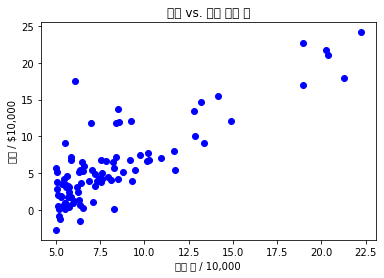

In [19]:
plt.scatter(x_train, y_train, marker='o', c='blue') 
plt.title("수익 vs. 도시 인구 수")
plt.ylabel('수익 / $10,000')
plt.xlabel('인구 수 / 10,000')
plt.show()

## 4) 선형 회귀 복습

- (w , b)를 사용해 선형회귀의 파라미터를 지정합니다.

$$f_{w,b}(x) = wx + b$$

- 선형회귀 모델을 학습하기 위해서는, (w,b)가 가장 적절한 